# Quantum Workshop Examples 

First, we will begin by importing Qiskit, IBM's quantum computing software that is written in Python! To create an experiment and run it, we will need to use Qiskit's Circuits, Registers, and Compilers. To use this notebook, you must copy your API token from the "My Account" page on the IBM Q Experience.

In [1]:
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.compiler import transpile
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#paste your token from the IBM Q here
token = "PLACE YOUR TOKEN HERE"
try:
    IBMQ.enable_account(token)
except:
    pass

#settings and backends
shots = 1024
simulator = Aer.get_backend('qasm_simulator')
state_vector_sim = Aer.get_backend('statevector_simulator')

print('qiskit vers.= %s'%qiskit.__version__)

qiskit vers.= 0.10.0


## 1. Superposition

First, we will demonstrate quantum superposition. This will be done using a one-qubit quantum machine that has a single gate: the Hadamard operation. Whenever the state vector for the wavefunction is examined, it is seen that the probability amplitudes for both $|0>$ and $|1>$ are equal to $\frac{1}{\sqrt{2}}$, indicating maximal superposition of the qubit. A measurement operation placed after the Hadamard gate allows for simulation of the circuit. This gate will 'observe' the quantum information and place it in the classical register. Once the circuit is complete with registers, a state transformation, and a measurement operation, experiments will be run using the Qiskit Aer simulator. Note how after each run, the output distribution varies slightly, but is close to a 50/50 split between the basis states $|0>$ and $|1>$ whenever the input quantum state is in a basis state.

In [2]:
qr = QuantumRegister(1, 'q_reg')
cr = ClassicalRegister(1, 'c_reg')
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])

#Must find state vector for wavefunction before you add measurement operators!
#(Measurement operators cause wavefunction collapse)
state_vector = execute(qc,state_vector_sim).result()
vector = state_vector.get_statevector(qc)
print('\nSTATEVECTOR: ', vector)

qc.measure(qr, cr)

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc.draw())
print('\nQASM SPECIFICATION:')
for i in qc.qasm():
    print(i,end='')
       

print('\nSIMULATION RESULTS:')
for i in range(0,3):
    job = execute(qc,simulator,shots=shots)
    result = job.result()
    counts = result.get_counts(qc)
    print('Simulation distribution %d:'%i, counts)
    


STATEVECTOR:  [0.70710678+0.j 0.70710678+0.j]

QUANTUM CIRCUIT DIAGRAM:
            ┌───┐┌─┐
q_reg_0: |0>┤ H ├┤M├
            └───┘└╥┘
 c_reg_0: 0 ══════╩═
                    

QASM SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[1];
creg c_reg[1];
h q_reg[0];
measure q_reg[0] -> c_reg[0];

SIMULATION RESULTS:
Simulation distribution 0: {'0': 515, '1': 509}
Simulation distribution 1: {'0': 510, '1': 514}
Simulation distribution 2: {'0': 531, '1': 493}


## 2. Entanglement
Next, we will experiment with quantum entanglement. The circuit studied will be the Bell State Generator that consists of a Hadamard gate and a CNOT gate.

In [3]:
qr2 = QuantumRegister(2, 'q_reg')
cr2 = ClassicalRegister(2, 'c_reg')
qc2 = QuantumCircuit(qr2, cr2)
qc2.h(qr2[0])
qc2.cx(qr2[0],qr2[1])

state_vector2 = execute(qc2,state_vector_sim).result()
vector2 = state_vector2.get_statevector(qc2)
print('\nSTATEVECTOR: ', vector2)

qc2.measure(qr2, cr2)

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc2.draw())
print('\nQASM SPECIFICATION:')
for i in qc2.qasm():
    print(i,end='')


STATEVECTOR:  [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

QUANTUM CIRCUIT DIAGRAM:
            ┌───┐     ┌─┐   
q_reg_0: |0>┤ H ├──■──┤M├───
            └───┘┌─┴─┐└╥┘┌─┐
q_reg_1: |0>─────┤ X ├─╫─┤M├
                 └───┘ ║ └╥┘
 c_reg_0: 0 ═══════════╩══╬═
                          ║ 
 c_reg_1: 0 ══════════════╩═
                            

QASM SPECIFICATION:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[2];
creg c_reg[2];
h q_reg[0];
cx q_reg[0],q_reg[1];
measure q_reg[0] -> c_reg[0];
measure q_reg[1] -> c_reg[1];


Take note how quantum registers are initialized to $|0>$. Therefore, the input to the Bell State Generator is $|00>$. When we simulate the Bell State Generator, we will get an output quantum state that is entangled. This particular output state is the Bell State $|\Phi^+>$.

In [4]:
print('\nSIMULATION RESULTS:')
for i in range(0,3):
    job2 = execute(qc2,simulator,shots=shots)
    result2 = job2.result()
    counts2 = result2.get_counts(qc2)
    print('Simulation distribution %d:'%i, counts2)
    state_vector2 = execute(qc2,state_vector_sim).result()
    vector2 = state_vector2.get_statevector(qc2)
    print('Statevector %d:'%i, vector2)



SIMULATION RESULTS:
Simulation distribution 0: {'11': 531, '00': 493}
Statevector 0: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Simulation distribution 1: {'11': 512, '00': 512}
Statevector 1: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
Simulation distribution 2: {'11': 499, '00': 525}
Statevector 2: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]


The rest of the Bell states, $|\Phi^->$, $|\Psi^+>$, $|\Psi^->$, can be generated whenever you change the input state sent into the generator. Input state can be changed by inserting Pauli-X gates on the qubit lines.

In [5]:
qr2 = QuantumRegister(2, 'q_reg')
cr2 = ClassicalRegister(2, 'c_reg')
qc2 = QuantumCircuit(qr2, cr2)
qc2.x(qr2[1])
qc2.h(qr2[0])
qc2.cx(qr2[0],qr2[1])

state_vector2 = execute(qc2,state_vector_sim).result()
vector2 = state_vector2.get_statevector(qc2)
print('\nSTATEVECTOR: ', vector2)

qc2.measure(qr2, cr2)

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc2.draw())

print('\nSIMULATION RESULTS:')
job2 = execute(qc2,simulator,shots=shots)
result2 = job2.result()
counts2 = result2.get_counts(qc2)
print('Simulation distribution:', counts2)


STATEVECTOR:  [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]

QUANTUM CIRCUIT DIAGRAM:
            ┌───┐     ┌─┐   
q_reg_0: |0>┤ H ├──■──┤M├───
            ├───┤┌─┴─┐└╥┘┌─┐
q_reg_1: |0>┤ X ├┤ X ├─╫─┤M├
            └───┘└───┘ ║ └╥┘
 c_reg_0: 0 ═══════════╩══╬═
                          ║ 
 c_reg_1: 0 ══════════════╩═
                            

SIMULATION RESULTS:
Simulation distribution: {'10': 498, '01': 526}


In [6]:
qr2 = QuantumRegister(2, 'q_reg')
cr2 = ClassicalRegister(2, 'c_reg')
qc2 = QuantumCircuit(qr2, cr2)
qc2.x(qr2[0])
qc2.h(qr2[0])
qc2.cx(qr2[0],qr2[1])

state_vector2 = execute(qc2,state_vector_sim).result()
vector2 = state_vector2.get_statevector(qc2)
print('\nSTATEVECTOR: ', vector2)

qc2.measure(qr2, cr2)

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc2.draw())

print('\nSIMULATION RESULTS:')
job2 = execute(qc2,simulator,shots=shots)
result2 = job2.result()
counts2 = result2.get_counts(qc2)
print('Simulation distribution:', counts2)


STATEVECTOR:  [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]

QUANTUM CIRCUIT DIAGRAM:
            ┌───┐┌───┐     ┌─┐   
q_reg_0: |0>┤ X ├┤ H ├──■──┤M├───
            └───┘└───┘┌─┴─┐└╥┘┌─┐
q_reg_1: |0>──────────┤ X ├─╫─┤M├
                      └───┘ ║ └╥┘
 c_reg_0: 0 ════════════════╩══╬═
                               ║ 
 c_reg_1: 0 ═══════════════════╩═
                                 

SIMULATION RESULTS:
Simulation distribution: {'11': 507, '00': 517}


In [7]:
qr2 = QuantumRegister(2, 'q_reg')
cr2 = ClassicalRegister(2, 'c_reg')
qc2 = QuantumCircuit(qr2, cr2)
qc2.x(qr2[0])
qc2.x(qr2[1])
qc2.h(qr2[0])
qc2.cx(qr2[0],qr2[1])

state_vector2 = execute(qc2,state_vector_sim).result()
vector2 = state_vector2.get_statevector(qc2)
print('\nSTATEVECTOR: ', vector2)

qc2.measure(qr2, cr2)

print('\nQUANTUM CIRCUIT DIAGRAM:')
print(qc2.draw())

print('\nSIMULATION RESULTS:')
job2 = execute(qc2,simulator,shots=shots)
result2 = job2.result()
counts2 = result2.get_counts(qc2)
print('Simulation distribution:', counts2)


STATEVECTOR:  [ 0.        +0.j -0.70710678+0.j  0.70710678+0.j  0.        +0.j]

QUANTUM CIRCUIT DIAGRAM:
            ┌───┐┌───┐     ┌─┐   
q_reg_0: |0>┤ X ├┤ H ├──■──┤M├───
            ├───┤└───┘┌─┴─┐└╥┘┌─┐
q_reg_1: |0>┤ X ├─────┤ X ├─╫─┤M├
            └───┘     └───┘ ║ └╥┘
 c_reg_0: 0 ════════════════╩══╬═
                               ║ 
 c_reg_1: 0 ═══════════════════╩═
                                 

SIMULATION RESULTS:
Simulation distribution: {'10': 498, '01': 526}


## 3. Algorithm Compilation

Whenever you want to run a quantum algorithm on a real quantum machine, gate libraries and device topology must be taken into consideration. In the exercise below, a Bell State oscillator circuit, or a cascade of four Bell State geneators, will be created with Hadamard and CNOT gates. This circuit will then be mapped to the 14 qubit Melborne Machine.

In [8]:
qr3 = QuantumRegister(2, 'q_reg')
cr3 = ClassicalRegister(2, 'c_reg')
qc3 = QuantumCircuit(qr3, cr3)
qc3.h(qr3[0])
qc3.cx(qr3[0],qr3[1])
qc3.h(qr3[0])
qc3.cx(qr3[0],qr3[1])
qc3.h(qr3[0])
qc3.cx(qr3[0],qr3[1])
qc3.h(qr3[0])
qc3.cx(qr3[0],qr3[1])

state_vector3 = execute(qc3,state_vector_sim).result()
vector3 = state_vector3.get_statevector(qc3)
print('\nSTATEVECTOR: ', vector3)

qc3.measure(qr3, cr3)

print('\nQUANTUM CIRCUIT DIAGRAM BEFORE COMPILE:')
print(qc3.draw())

print('\nQASM SPECIFICATION BEFORE COMPILE:')
for i in qc3.qasm():
    print(i,end='')




STATEVECTOR:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j]

QUANTUM CIRCUIT DIAGRAM BEFORE COMPILE:
            ┌───┐     ┌───┐     ┌───┐     ┌───┐     ┌─┐   
q_reg_0: |0>┤ H ├──■──┤ H ├──■──┤ H ├──■──┤ H ├──■──┤M├───
            └───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└───┘┌─┴─┐└╥┘┌─┐
q_reg_1: |0>─────┤ X ├─────┤ X ├─────┤ X ├─────┤ X ├─╫─┤M├
                 └───┘     └───┘     └───┘     └───┘ ║ └╥┘
 c_reg_0: 0 ═════════════════════════════════════════╩══╬═
                                                        ║ 
 c_reg_1: 0 ════════════════════════════════════════════╩═
                                                          

QASM SPECIFICATION BEFORE COMPILE:
OPENQASM 2.0;
include "qelib1.inc";
qreg q_reg[2];
creg c_reg[2];
h q_reg[0];
cx q_reg[0],q_reg[1];
h q_reg[0];
cx q_reg[0],q_reg[1];
h q_reg[0];
cx q_reg[0],q_reg[1];
h q_reg[0];
cx q_reg[0],q_reg[1];
measure q_reg[0] -> c_reg[0];
measure q_reg[1] -> c_reg[1];


In [9]:
provider = IBMQ.get_provider(group='open')
device = provider.get_backend('ibmq_16_melbourne')
basis_gates = device.configuration().basis_gates
coupling_map = device.configuration().coupling_map

print('\nQC MELBOURNE PROPERTIES:', basis_gates)
print('\nQC MELBOURNE COUPLING MAP:', coupling_map)

#device.properties() #returns lots of useful things


QC MELBOURNE PROPERTIES: ['u1', 'u2', 'u3', 'cx', 'id']

QC MELBOURNE COUPLING MAP: [[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]


In [10]:
executable = transpile(circuits=qc3, basis_gates=['u1','u2','u3','cx'],seed_transpiler=1,coupling_map=coupling_map)
job3 = execute(executable,simulator,shots=shots)

print('\nQUANTUM CIRCUIT DIAGRAM AFTER COMPILE:')
print(executable.draw())

print('\nQASM SPECIFICATION AFTER COMPILE:')
for i in executable.qasm():
    print(i,end='')
    
print('\nSIMULATION RESULTS:')
result3 = job3.result()
counts3 = result3.get_counts(qc3)
print('Simulation distribution:', counts3)
print()


QUANTUM CIRCUIT DIAGRAM AFTER COMPILE:
                              ┌───┐┌──────────┐┌───┐┌──────────┐┌───┐»
    (q_reg0) q0|0>────────────┤ X ├┤ U2(0,pi) ├┤ X ├┤ U2(0,pi) ├┤ X ├»
                  ┌──────────┐└─┬─┘└──────────┘└─┬─┘└──────────┘└─┬─┘»
    (q_reg1) q1|0>┤ U2(0,pi) ├──■────────────────■────────────────■──»
                  └──────────┘                                       »
  (ancilla0) q2|0>───────────────────────────────────────────────────»
                                                                     »
  (ancilla1) q3|0>───────────────────────────────────────────────────»
                                                                     »
  (ancilla2) q4|0>───────────────────────────────────────────────────»
                                                                     »
  (ancilla3) q5|0>───────────────────────────────────────────────────»
                                                                     »
  (ancilla4) q6|0>───────────────────

## 4. Implementation of Deutsch's Algorithm

A function, $f(x)$, can be constant or balanced. When the function is balanced, $f(x) = 0$ for half of the values of $x$ and $f(x) = 1$ for the other half. In classical computing, $\frac{2^n}{2} + 1$ trials are required to determine if a function is constant or balanced. Deutsch's Algorithm implemented with a quantum computer, however, allows you to determine if a function is constant or balanced with a single trial. The result of the algorithm will be a measurement of $0$ if the function is constant or $1$ if the function is balanced. In the example below, Deutsch's algorithm will be implemented with the function for $n=1$, $f(x) = x_1$. This is a balanced function, and evaluation of Deutsch algorithm equal to 1 will confirm that. This experiment will be run on both the simulator as well as on one of the IBM Q machines.


In [11]:
# Creating registers
qr = QuantumRegister(2)
# classical registers for recording the measurement on qr
cr = ClassicalRegister(2)

qc = QuantumCircuit(qr, cr)
barriers = True

# initialize the ancilla qubit in the |1> state
qc.x(qr[1])

# Apply barrier 
if barriers:
    qc.barrier()

# Apply Hadamard gates before querying the oracle
qc.h(qr[0])    
qc.h(qr[1])    

# Apply barrier 
if barriers:
    qc.barrier()

# Query the oracle 
qc.cx(qr[0], qr[1])

# Apply barrier 
if barriers:
    qc.barrier()

# Apply Hadamard gates after querying the oracle
qc.h(qr[0])    
qc.h(qr[1])    

# Measure the input qubit
qc.measure(qr[0], cr[0])

# Draw the Deutsch Algorithm Implementation
print('\nALGORITHM CIRCUIT DIAGRAM:')
print(qc.draw())


ALGORITHM CIRCUIT DIAGRAM:
               ░ ┌───┐ ░       ░ ┌───┐┌─┐
q4_0: |0>──────░─┤ H ├─░───■───░─┤ H ├┤M├
         ┌───┐ ░ ├───┤ ░ ┌─┴─┐ ░ ├───┤└╥┘
q4_1: |0>┤ X ├─░─┤ H ├─░─┤ X ├─░─┤ H ├─╫─
         └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ║ 
 c0_0: 0 ══════════════════════════════╩═
                                         
 c0_1: 0 ════════════════════════════════
                                         


c0 = 1 (1024 shots)


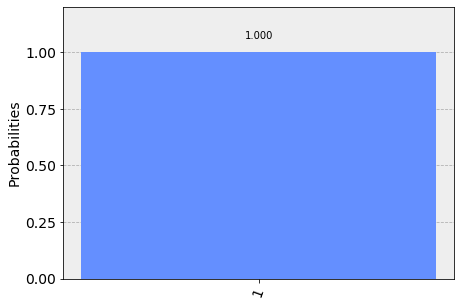

In [12]:
# use local simulator
results = execute(qc, backend=simulator, shots=shots).result()
answer = results.get_counts()

# categorize answers to c0 = 0 and c0 = 1
answer_c0 = {}
for c1c0 in answer:
    print('c0 = {} ({} shots)'.format(c1c0[1], answer[c1c0]))

    if c1c0[1] in answer_c0:
        answer_c0[c1c0[1]] += answer[c1c0]
    else:
        answer_c0[c1c0[1]] = answer[c1c0]

plot_histogram(answer_c0)

In [13]:
# Check status of machines and use least busy for experiment
IBMQ.backends()

backend_lb = least_busy(IBMQ.backends(simulator=False))
print("Least busy backend: ", backend_lb)

//anaconda3/envs/quantum_env/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
//anaconda3/envs/quantum_env/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


Least busy backend:  ibmq_london


In [14]:
job_exp = execute(qc, backend=backend_lb, shots=shots)
job_monitor(job_exp, interval = 2)

Job Status: job has successfully run


c0 = 0 (55 shots)
c0 = 1 (969 shots)
{'0': 55, '1': 969}


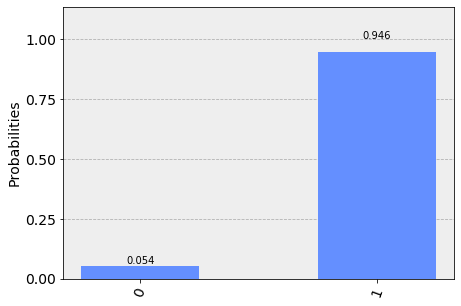

In [15]:
results = job_exp.result()
answer = results.get_counts(qc)

# categorize answers to c0 = 0 and c0 = 1
answer_c0 = {}
for c1c0 in answer:
    print('c0 = {} ({} shots)'.format(c1c0[1], answer[c1c0]))
    if c1c0[1] in answer_c0:
        answer_c0[c1c0[1]] += answer[c1c0]
    else:
        answer_c0[c1c0[1]] = answer[c1c0]

# show answers
print(answer_c0)
plot_histogram(answer_c0)